## Introduction
This notebook originated from the Kaggle bot! However, it only looked at the names of the EEG files in the directory.  Rafael has added the rest.

In [3]:
# Colab settings/mount
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/CSE\ 240/Project/Data/EEG

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/CSE 240/Project/Data/EEG'
/content/gdrive/My Drive/CSE 240/Project/Data


In [14]:
!ls

eeg_small.png  S006E04.edf  S013E01.edf  S019E02.edf  S025E03.edf
raw_images     S007E01.edf  S013E02.edf  S019E03.edf  S025E04.edf
S001E01.edf    S007E02.edf  S013E03.edf  S019E04.edf  S026E01.edf
S001E02.edf    S007E03.edf  S013E04.edf  S020E01.edf  S026E02.edf
S001E03.edf    S007E04.edf  S014E01.edf  S020E02.edf  S026E03.edf
S001E04.edf    S008E01.edf  S014E02.edf  S020E03.edf  S026E04.edf
S002E01.edf    S008E02.edf  S014E03.edf  S020E04.edf  S027E01.edf
S002E02.edf    S008E03.edf  S014E04.edf  S021E01.edf  S027E02.edf
S002E03.edf    S008E04.edf  S015E01.edf  S021E02.edf  S027E03.edf
S002E04.edf    S009E01.edf  S015E02.edf  S021E03.edf  S027E04.edf
S003E01.edf    S009E02.edf  S015E03.edf  S021E04.edf  S028E01.edf
S003E02.edf    S009E03.edf  S015E04.edf  S022E01.edf  S028E02.edf
S003E03.edf    S009E04.edf  S016E01.edf  S022E02.edf  S028E03.edf
S003E04.edf    S010E01.edf  S016E02.edf  S022E03.edf  S028E04.edf
S004E01.edf    S010E02.edf  S016E03.edf  S022E04.edf  S029E01.edf
S004E02.ed

In [0]:
import mne    # for reading .edf files (and much else)

In [16]:
file = "S001E01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [17]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2018-06-13 14:34:37 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

In [18]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [19]:
raw_data.shape

(14, 46080)

## Exploratory Analysis
The following packages are often useful.

In [0]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
#import os # accessing directory structure
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from scipy.io import loadmat   # this function imports .MAT files (MatLab files) into Python (as directories)

### EEG Data

The actual surface electrode readings are given in the dat6 array. For example, at time 1000 we have the following microvolt measurments at each of the 25 leads.

In [21]:
raw_data[:, 1000]

array([4.27519883e-05, 4.65109476e-05, 2.76258476e-05, 5.37701260e-05,
       1.93465649e-05, 1.24181482e-05, 1.06720265e-05, 1.67187913e-05,
       8.44941075e-05, 2.36010758e-05, 4.19182986e-05, 2.76447411e-05,
       2.96294392e-05, 1.54665940e-04])

Lets take a look at lead 10.

In [22]:
channel = 1   # occipital lead  O1 
raw_data[channel, : 50]

array([ 8.65048524e-07,  2.36749975e-06,  2.36749975e-06,  8.65048524e-07,
       -1.71058215e-06, -2.71221630e-06, -2.21139922e-06, -7.08947997e-07,
       -2.08130922e-07, -7.08947997e-07, -1.71058215e-06, -2.21139922e-06,
       -2.21139922e-06, -1.71058215e-06, -2.71221630e-06, -2.71221630e-06,
       -1.20976507e-06,  2.36749975e-06,  4.44231334e-06,  1.86668267e-06,
       -5.28784697e-06, -1.25139219e-05, -1.55903696e-05, -1.14407425e-05,
       -3.28457867e-06,  5.44394749e-06,  1.10960259e-05,  1.20976601e-05,
        1.00943918e-05,  7.01794401e-06,  3.94149627e-06,  2.36749975e-06,
        1.86668267e-06,  2.36749975e-06,  3.94149627e-06,  5.44394749e-06,
        5.94476457e-06,  4.44231334e-06, -2.08130922e-07, -6.36102641e-06,
       -1.04391083e-05, -9.93829123e-06, -5.78866404e-06,  8.65048524e-07,
        5.44394749e-06,  5.94476457e-06,  3.44067919e-06, -2.08130922e-07,
       -3.28457867e-06, -5.28784697e-06])

In [23]:
channels[channel]

'F7'

In [24]:
raw_data[channel,:]

array([8.65048524e-07, 2.36749975e-06, 2.36749975e-06, ...,
       9.41601150e-05, 9.31584809e-05, 8.95812161e-05])

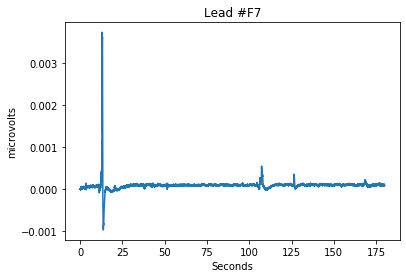

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, len(raw_data[channel, :]) / 256., len(raw_data[channel, :]))
y = raw_data[channel, :]

plt.plot(x, y)
plt.title('Lead #' + channels[channel]) 
plt.xlabel('Seconds'); plt.ylabel('microvolts')
plt.show()

Let's create a spectrogram for this lead.

[5.41662943e-05 5.26638431e-05 5.57402909e-05 ... 8.44299547e-05
 8.44299547e-05 8.49307718e-05]


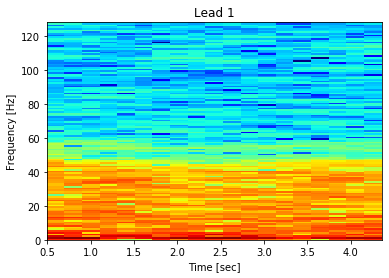

In [26]:
from scipy import signal

x = raw_data[channel, 1280:2560]
print(x)
#x = raw_data[channel, 1280:2561]
#fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
#f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Lead ' + str(channel)) # + LsEEG[channel]
plt.set_cmap('jet')
#plt.show()
fig, ax = plt.subplots( nrows=1, ncols=1 )
fig.figsize= (800, 800)
ax.pcolormesh(t, f, np.log10(Sxx))
fig.savefig('eeg_small.png')   # save the figure to file
plt.close(fig)


In [27]:
print(len(t))

20


## Run this to generate images

In [0]:
import matplotlib.pyplot as plt # plotting
import mne
import numpy as np # linear algebra
import os
from scipy import signal
from sklearn.preprocessing import StandardScaler

# If folders don't exist already create them in the home directory.
if not os.path.exists("raw_images"):
    os.mkdir("raw_images")
if not os.path.exists("raw_images/relaxed"):
    os.mkdir("raw_images/relaxed")
if not os.path.exists("raw_images/concentration"):
    os.mkdir("raw_images/concentration")
if not os.path.exists("spectrogram_images"):
    os.mkdir("spectrogram_images")
if not os.path.exists("spectrogram_images/relaxed"):
    os.mkdir("spectrogram_images/relaxed")
if not os.path.exists("spectrogram_images/concentration"):
    os.mkdir("spectrogram_images/concentration")

for filename in os.listdir('.'):
    file_name = os.path.join('.',filename)
  
    file_type = 0 if filename.split(".")[0].endswith("E01") or filename.split(".")[0].endswith("E03") else 1
    data = mne.io.read_raw_edf(file_name)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    for part in range(36):
        for index, channel in enumerate(channels):
            print("Processing %s channel of file %s part %s." % (channel, filename, part))
            folder_name = filename.split(".")[0] + "_" + str(part)
            folder_path = os.path.join('raw_images/relaxed',folder_name) if file_type == 0 else os.path.join('raw_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            # path to store raw time domain images of the signals
            # choose folder based on file type
            start = part * 1280
            end = (part+1) * 1280
            new_file_path = os.path.join(folder_path, new_filename)
            x = np.linspace(0, len(raw_data[index, start:end]) / 256., len(raw_data[index, start:end]))
            y = raw_data[index, start:end]
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.plot(x, y)
            #ax.title('Lead #' + channel) 
            #ax.xlabel('Seconds'); plt.ylabel('microvolts')
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
            #plt.plot(x, y)
            #plt.show()

            # path to store frequency domain spectrogram images of the signals
            folder_path = os.path.join('spectrogram_images/relaxed',folder_name) if file_type == 0 else os.path.join('spectrogram_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            new_file_path = os.path.join(folder_path, new_filename)
            x = raw_data[index, start:end]
            fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
            #f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
            f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.pcolormesh(t, f, np.log10(Sxx))
            #ax.ylabel('Frequency [Hz]')
            #ax.xlabel('Time [sec]')
            #plt.title('Lead ' + channel) # + LsEEG[channel]
            #ax.set_cmap('jet')
            #plt.show()
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
    
    '''
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('spectrogram_files',new_filename)
    os.mkdir(new_file_path)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)
    '''

Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S028E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S028E02.edf part 0.
creating folder S028E02_0.
Processing F7 channel of file S028E02.edf part 0.


<ipython-input-29-0387420c57ef>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing F3 channel of file S028E02.edf part 0.
Processing FC5 channel of file S028E02.edf part 0.
Processing T7 channel of file S028E02.edf part 0.
Processing P7 channel of file S028E02.edf part 0.
Processing O1 channel of file S028E02.edf part 0.
Processing O2 channel of file S028E02.edf part 0.
Processing P8 channel of file S028E02.edf part 0.
Processing T8 channel of file S028E02.edf part 0.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 0.
Processing F4 channel of file S028E02.edf part 0.
Processing F8 channel of file S028E02.edf part 0.
Processing AF4 channel of file S028E02.edf part 0.
Processing AF3 channel of file S028E02.edf part 1.
creating folder S028E02_1.
Processing F7 channel of file S028E02.edf part 1.
Processing F3 channel of file S028E02.edf part 1.
Processing FC5 channel of file S028E02.edf part 1.
Processing T7 channel of file S028E02.edf part 1.
Processing P7 channel of file S028E02.edf part 1.
Processing O1 channel of file S028E02.edf part 1.
Processing O2 channel of file S028E02.edf part 1.
Processing P8 channel of file S028E02.edf part 1.
Processing T8 channel of file S028E02.edf part 1.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 1.
Processing F4 channel of file S028E02.edf part 1.
Processing F8 channel of file S028E02.edf part 1.
Processing AF4 channel of file S028E02.edf part 1.
Processing AF3 channel of file S028E02.edf part 2.
creating folder S028E02_2.
Processing F7 channel of file S028E02.edf part 2.
Processing F3 channel of file S028E02.edf part 2.
Processing FC5 channel of file S028E02.edf part 2.
Processing T7 channel of file S028E02.edf part 2.
Processing P7 channel of file S028E02.edf part 2.
Processing O1 channel of file S028E02.edf part 2.
Processing O2 channel of file S028E02.edf part 2.
Processing P8 channel of file S028E02.edf part 2.
Processing T8 channel of file S028E02.edf part 2.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 2.
Processing F4 channel of file S028E02.edf part 2.
Processing F8 channel of file S028E02.edf part 2.
Processing AF4 channel of file S028E02.edf part 2.
Processing AF3 channel of file S028E02.edf part 3.
creating folder S028E02_3.
Processing F7 channel of file S028E02.edf part 3.
Processing F3 channel of file S028E02.edf part 3.
Processing FC5 channel of file S028E02.edf part 3.
Processing T7 channel of file S028E02.edf part 3.
Processing P7 channel of file S028E02.edf part 3.
Processing O1 channel of file S028E02.edf part 3.
Processing O2 channel of file S028E02.edf part 3.
Processing P8 channel of file S028E02.edf part 3.
Processing T8 channel of file S028E02.edf part 3.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 3.
Processing F4 channel of file S028E02.edf part 3.
Processing F8 channel of file S028E02.edf part 3.
Processing AF4 channel of file S028E02.edf part 3.
Processing AF3 channel of file S028E02.edf part 4.
creating folder S028E02_4.
Processing F7 channel of file S028E02.edf part 4.
Processing F3 channel of file S028E02.edf part 4.
Processing FC5 channel of file S028E02.edf part 4.
Processing T7 channel of file S028E02.edf part 4.
Processing P7 channel of file S028E02.edf part 4.
Processing O1 channel of file S028E02.edf part 4.
Processing O2 channel of file S028E02.edf part 4.
Processing P8 channel of file S028E02.edf part 4.
Processing T8 channel of file S028E02.edf part 4.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 4.
Processing F4 channel of file S028E02.edf part 4.
Processing F8 channel of file S028E02.edf part 4.
Processing AF4 channel of file S028E02.edf part 4.
Processing AF3 channel of file S028E02.edf part 5.
creating folder S028E02_5.
Processing F7 channel of file S028E02.edf part 5.
Processing F3 channel of file S028E02.edf part 5.
Processing FC5 channel of file S028E02.edf part 5.
Processing T7 channel of file S028E02.edf part 5.
Processing P7 channel of file S028E02.edf part 5.
Processing O1 channel of file S028E02.edf part 5.
Processing O2 channel of file S028E02.edf part 5.
Processing P8 channel of file S028E02.edf part 5.
Processing T8 channel of file S028E02.edf part 5.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 5.
Processing F4 channel of file S028E02.edf part 5.
Processing F8 channel of file S028E02.edf part 5.
Processing AF4 channel of file S028E02.edf part 5.
Processing AF3 channel of file S028E02.edf part 6.
creating folder S028E02_6.
Processing F7 channel of file S028E02.edf part 6.
Processing F3 channel of file S028E02.edf part 6.
Processing FC5 channel of file S028E02.edf part 6.
Processing T7 channel of file S028E02.edf part 6.
Processing P7 channel of file S028E02.edf part 6.
Processing O1 channel of file S028E02.edf part 6.
Processing O2 channel of file S028E02.edf part 6.
Processing P8 channel of file S028E02.edf part 6.
Processing T8 channel of file S028E02.edf part 6.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 6.
Processing F4 channel of file S028E02.edf part 6.
Processing F8 channel of file S028E02.edf part 6.
Processing AF4 channel of file S028E02.edf part 6.
Processing AF3 channel of file S028E02.edf part 7.
creating folder S028E02_7.
Processing F7 channel of file S028E02.edf part 7.
Processing F3 channel of file S028E02.edf part 7.
Processing FC5 channel of file S028E02.edf part 7.
Processing T7 channel of file S028E02.edf part 7.
Processing P7 channel of file S028E02.edf part 7.
Processing O1 channel of file S028E02.edf part 7.
Processing O2 channel of file S028E02.edf part 7.
Processing P8 channel of file S028E02.edf part 7.
Processing T8 channel of file S028E02.edf part 7.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 7.
Processing F4 channel of file S028E02.edf part 7.
Processing F8 channel of file S028E02.edf part 7.
Processing AF4 channel of file S028E02.edf part 7.
Processing AF3 channel of file S028E02.edf part 8.
creating folder S028E02_8.
Processing F7 channel of file S028E02.edf part 8.
Processing F3 channel of file S028E02.edf part 8.
Processing FC5 channel of file S028E02.edf part 8.
Processing T7 channel of file S028E02.edf part 8.
Processing P7 channel of file S028E02.edf part 8.
Processing O1 channel of file S028E02.edf part 8.
Processing O2 channel of file S028E02.edf part 8.
Processing P8 channel of file S028E02.edf part 8.
Processing T8 channel of file S028E02.edf part 8.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 8.
Processing F4 channel of file S028E02.edf part 8.
Processing F8 channel of file S028E02.edf part 8.
Processing AF4 channel of file S028E02.edf part 8.
Processing AF3 channel of file S028E02.edf part 9.
creating folder S028E02_9.
Processing F7 channel of file S028E02.edf part 9.
Processing F3 channel of file S028E02.edf part 9.
Processing FC5 channel of file S028E02.edf part 9.
Processing T7 channel of file S028E02.edf part 9.
Processing P7 channel of file S028E02.edf part 9.
Processing O1 channel of file S028E02.edf part 9.
Processing O2 channel of file S028E02.edf part 9.
Processing P8 channel of file S028E02.edf part 9.
Processing T8 channel of file S028E02.edf part 9.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 9.
Processing F4 channel of file S028E02.edf part 9.
Processing F8 channel of file S028E02.edf part 9.
Processing AF4 channel of file S028E02.edf part 9.
Processing AF3 channel of file S028E02.edf part 10.
creating folder S028E02_10.
Processing F7 channel of file S028E02.edf part 10.
Processing F3 channel of file S028E02.edf part 10.
Processing FC5 channel of file S028E02.edf part 10.
Processing T7 channel of file S028E02.edf part 10.
Processing P7 channel of file S028E02.edf part 10.
Processing O1 channel of file S028E02.edf part 10.
Processing O2 channel of file S028E02.edf part 10.
Processing P8 channel of file S028E02.edf part 10.
Processing T8 channel of file S028E02.edf part 10.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 10.
Processing F4 channel of file S028E02.edf part 10.
Processing F8 channel of file S028E02.edf part 10.
Processing AF4 channel of file S028E02.edf part 10.
Processing AF3 channel of file S028E02.edf part 11.
creating folder S028E02_11.
Processing F7 channel of file S028E02.edf part 11.
Processing F3 channel of file S028E02.edf part 11.
Processing FC5 channel of file S028E02.edf part 11.
Processing T7 channel of file S028E02.edf part 11.
Processing P7 channel of file S028E02.edf part 11.
Processing O1 channel of file S028E02.edf part 11.
Processing O2 channel of file S028E02.edf part 11.
Processing P8 channel of file S028E02.edf part 11.
Processing T8 channel of file S028E02.edf part 11.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 11.
Processing F4 channel of file S028E02.edf part 11.
Processing F8 channel of file S028E02.edf part 11.
Processing AF4 channel of file S028E02.edf part 11.
Processing AF3 channel of file S028E02.edf part 12.
creating folder S028E02_12.
Processing F7 channel of file S028E02.edf part 12.
Processing F3 channel of file S028E02.edf part 12.
Processing FC5 channel of file S028E02.edf part 12.
Processing T7 channel of file S028E02.edf part 12.
Processing P7 channel of file S028E02.edf part 12.
Processing O1 channel of file S028E02.edf part 12.
Processing O2 channel of file S028E02.edf part 12.
Processing P8 channel of file S028E02.edf part 12.
Processing T8 channel of file S028E02.edf part 12.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 12.
Processing F4 channel of file S028E02.edf part 12.
Processing F8 channel of file S028E02.edf part 12.
Processing AF4 channel of file S028E02.edf part 12.
Processing AF3 channel of file S028E02.edf part 13.
creating folder S028E02_13.
Processing F7 channel of file S028E02.edf part 13.
Processing F3 channel of file S028E02.edf part 13.
Processing FC5 channel of file S028E02.edf part 13.
Processing T7 channel of file S028E02.edf part 13.
Processing P7 channel of file S028E02.edf part 13.
Processing O1 channel of file S028E02.edf part 13.
Processing O2 channel of file S028E02.edf part 13.
Processing P8 channel of file S028E02.edf part 13.
Processing T8 channel of file S028E02.edf part 13.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 13.
Processing F4 channel of file S028E02.edf part 13.
Processing F8 channel of file S028E02.edf part 13.
Processing AF4 channel of file S028E02.edf part 13.
Processing AF3 channel of file S028E02.edf part 14.
creating folder S028E02_14.
Processing F7 channel of file S028E02.edf part 14.
Processing F3 channel of file S028E02.edf part 14.
Processing FC5 channel of file S028E02.edf part 14.
Processing T7 channel of file S028E02.edf part 14.
Processing P7 channel of file S028E02.edf part 14.
Processing O1 channel of file S028E02.edf part 14.
Processing O2 channel of file S028E02.edf part 14.
Processing P8 channel of file S028E02.edf part 14.
Processing T8 channel of file S028E02.edf part 14.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 14.
Processing F4 channel of file S028E02.edf part 14.
Processing F8 channel of file S028E02.edf part 14.
Processing AF4 channel of file S028E02.edf part 14.
Processing AF3 channel of file S028E02.edf part 15.
creating folder S028E02_15.
Processing F7 channel of file S028E02.edf part 15.
Processing F3 channel of file S028E02.edf part 15.
Processing FC5 channel of file S028E02.edf part 15.
Processing T7 channel of file S028E02.edf part 15.
Processing P7 channel of file S028E02.edf part 15.
Processing O1 channel of file S028E02.edf part 15.
Processing O2 channel of file S028E02.edf part 15.
Processing P8 channel of file S028E02.edf part 15.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 15.
Processing FC6 channel of file S028E02.edf part 15.
Processing F4 channel of file S028E02.edf part 15.
Processing F8 channel of file S028E02.edf part 15.
Processing AF4 channel of file S028E02.edf part 15.
Processing AF3 channel of file S028E02.edf part 16.
creating folder S028E02_16.
Processing F7 channel of file S028E02.edf part 16.
Processing F3 channel of file S028E02.edf part 16.
Processing FC5 channel of file S028E02.edf part 16.
Processing T7 channel of file S028E02.edf part 16.
Processing P7 channel of file S028E02.edf part 16.
Processing O1 channel of file S028E02.edf part 16.
Processing O2 channel of file S028E02.edf part 16.
Processing P8 channel of file S028E02.edf part 16.
Processing T8 channel of file S028E02.edf part 16.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 16.
Processing F4 channel of file S028E02.edf part 16.
Processing F8 channel of file S028E02.edf part 16.
Processing AF4 channel of file S028E02.edf part 16.
Processing AF3 channel of file S028E02.edf part 17.
creating folder S028E02_17.
Processing F7 channel of file S028E02.edf part 17.
Processing F3 channel of file S028E02.edf part 17.
Processing FC5 channel of file S028E02.edf part 17.
Processing T7 channel of file S028E02.edf part 17.
Processing P7 channel of file S028E02.edf part 17.
Processing O1 channel of file S028E02.edf part 17.
Processing O2 channel of file S028E02.edf part 17.
Processing P8 channel of file S028E02.edf part 17.
Processing T8 channel of file S028E02.edf part 17.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 17.
Processing F4 channel of file S028E02.edf part 17.
Processing F8 channel of file S028E02.edf part 17.
Processing AF4 channel of file S028E02.edf part 17.
Processing AF3 channel of file S028E02.edf part 18.
creating folder S028E02_18.
Processing F7 channel of file S028E02.edf part 18.
Processing F3 channel of file S028E02.edf part 18.
Processing FC5 channel of file S028E02.edf part 18.
Processing T7 channel of file S028E02.edf part 18.
Processing P7 channel of file S028E02.edf part 18.
Processing O1 channel of file S028E02.edf part 18.
Processing O2 channel of file S028E02.edf part 18.
Processing P8 channel of file S028E02.edf part 18.
Processing T8 channel of file S028E02.edf part 18.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 18.
Processing F4 channel of file S028E02.edf part 18.
Processing F8 channel of file S028E02.edf part 18.
Processing AF4 channel of file S028E02.edf part 18.
Processing AF3 channel of file S028E02.edf part 19.
creating folder S028E02_19.
Processing F7 channel of file S028E02.edf part 19.
Processing F3 channel of file S028E02.edf part 19.
Processing FC5 channel of file S028E02.edf part 19.
Processing T7 channel of file S028E02.edf part 19.
Processing P7 channel of file S028E02.edf part 19.
Processing O1 channel of file S028E02.edf part 19.
Processing O2 channel of file S028E02.edf part 19.
Processing P8 channel of file S028E02.edf part 19.
Processing T8 channel of file S028E02.edf part 19.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 19.
Processing F4 channel of file S028E02.edf part 19.
Processing F8 channel of file S028E02.edf part 19.
Processing AF4 channel of file S028E02.edf part 19.
Processing AF3 channel of file S028E02.edf part 20.
creating folder S028E02_20.
Processing F7 channel of file S028E02.edf part 20.
Processing F3 channel of file S028E02.edf part 20.
Processing FC5 channel of file S028E02.edf part 20.
Processing T7 channel of file S028E02.edf part 20.
Processing P7 channel of file S028E02.edf part 20.
Processing O1 channel of file S028E02.edf part 20.
Processing O2 channel of file S028E02.edf part 20.
Processing P8 channel of file S028E02.edf part 20.
Processing T8 channel of file S028E02.edf part 20.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing FC6 channel of file S028E02.edf part 20.
Processing F4 channel of file S028E02.edf part 20.
Processing F8 channel of file S028E02.edf part 20.
Processing AF4 channel of file S028E02.edf part 20.
Processing AF3 channel of file S028E02.edf part 21.
creating folder S028E02_21.
Processing F7 channel of file S028E02.edf part 21.
Processing F3 channel of file S028E02.edf part 21.
Processing FC5 channel of file S028E02.edf part 21.
Processing T7 channel of file S028E02.edf part 21.
Processing P7 channel of file S028E02.edf part 21.
Processing O1 channel of file S028E02.edf part 21.
Processing O2 channel of file S028E02.edf part 21.
Processing P8 channel of file S028E02.edf part 21.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 21.
Processing FC6 channel of file S028E02.edf part 21.
Processing F4 channel of file S028E02.edf part 21.
Processing F8 channel of file S028E02.edf part 21.
Processing AF4 channel of file S028E02.edf part 21.
Processing AF3 channel of file S028E02.edf part 22.
creating folder S028E02_22.
Processing F7 channel of file S028E02.edf part 22.
Processing F3 channel of file S028E02.edf part 22.
Processing FC5 channel of file S028E02.edf part 22.
Processing T7 channel of file S028E02.edf part 22.
Processing P7 channel of file S028E02.edf part 22.
Processing O1 channel of file S028E02.edf part 22.
Processing O2 channel of file S028E02.edf part 22.
Processing P8 channel of file S028E02.edf part 22.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 22.
Processing FC6 channel of file S028E02.edf part 22.
Processing F4 channel of file S028E02.edf part 22.
Processing F8 channel of file S028E02.edf part 22.
Processing AF4 channel of file S028E02.edf part 22.
Processing AF3 channel of file S028E02.edf part 23.
creating folder S028E02_23.
Processing F7 channel of file S028E02.edf part 23.
Processing F3 channel of file S028E02.edf part 23.
Processing FC5 channel of file S028E02.edf part 23.
Processing T7 channel of file S028E02.edf part 23.
Processing P7 channel of file S028E02.edf part 23.
Processing O1 channel of file S028E02.edf part 23.
Processing O2 channel of file S028E02.edf part 23.
Processing P8 channel of file S028E02.edf part 23.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 23.
Processing FC6 channel of file S028E02.edf part 23.
Processing F4 channel of file S028E02.edf part 23.
Processing F8 channel of file S028E02.edf part 23.
Processing AF4 channel of file S028E02.edf part 23.
Processing AF3 channel of file S028E02.edf part 24.
creating folder S028E02_24.
Processing F7 channel of file S028E02.edf part 24.
Processing F3 channel of file S028E02.edf part 24.
Processing FC5 channel of file S028E02.edf part 24.
Processing T7 channel of file S028E02.edf part 24.
Processing P7 channel of file S028E02.edf part 24.
Processing O1 channel of file S028E02.edf part 24.
Processing O2 channel of file S028E02.edf part 24.
Processing P8 channel of file S028E02.edf part 24.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 24.
Processing FC6 channel of file S028E02.edf part 24.
Processing F4 channel of file S028E02.edf part 24.
Processing F8 channel of file S028E02.edf part 24.
Processing AF4 channel of file S028E02.edf part 24.
Processing AF3 channel of file S028E02.edf part 25.
creating folder S028E02_25.
Processing F7 channel of file S028E02.edf part 25.
Processing F3 channel of file S028E02.edf part 25.
Processing FC5 channel of file S028E02.edf part 25.
Processing T7 channel of file S028E02.edf part 25.
Processing P7 channel of file S028E02.edf part 25.
Processing O1 channel of file S028E02.edf part 25.
Processing O2 channel of file S028E02.edf part 25.
Processing P8 channel of file S028E02.edf part 25.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 25.
Processing FC6 channel of file S028E02.edf part 25.
Processing F4 channel of file S028E02.edf part 25.
Processing F8 channel of file S028E02.edf part 25.
Processing AF4 channel of file S028E02.edf part 25.
Processing AF3 channel of file S028E02.edf part 26.
creating folder S028E02_26.
Processing F7 channel of file S028E02.edf part 26.
Processing F3 channel of file S028E02.edf part 26.
Processing FC5 channel of file S028E02.edf part 26.
Processing T7 channel of file S028E02.edf part 26.
Processing P7 channel of file S028E02.edf part 26.
Processing O1 channel of file S028E02.edf part 26.
Processing O2 channel of file S028E02.edf part 26.
Processing P8 channel of file S028E02.edf part 26.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 26.
Processing FC6 channel of file S028E02.edf part 26.
Processing F4 channel of file S028E02.edf part 26.
Processing F8 channel of file S028E02.edf part 26.
Processing AF4 channel of file S028E02.edf part 26.
Processing AF3 channel of file S028E02.edf part 27.
creating folder S028E02_27.
Processing F7 channel of file S028E02.edf part 27.
Processing F3 channel of file S028E02.edf part 27.
Processing FC5 channel of file S028E02.edf part 27.
Processing T7 channel of file S028E02.edf part 27.
Processing P7 channel of file S028E02.edf part 27.
Processing O1 channel of file S028E02.edf part 27.
Processing O2 channel of file S028E02.edf part 27.
Processing P8 channel of file S028E02.edf part 27.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 27.
Processing FC6 channel of file S028E02.edf part 27.
Processing F4 channel of file S028E02.edf part 27.
Processing F8 channel of file S028E02.edf part 27.
Processing AF4 channel of file S028E02.edf part 27.
Processing AF3 channel of file S028E02.edf part 28.
creating folder S028E02_28.
Processing F7 channel of file S028E02.edf part 28.
Processing F3 channel of file S028E02.edf part 28.
Processing FC5 channel of file S028E02.edf part 28.
Processing T7 channel of file S028E02.edf part 28.
Processing P7 channel of file S028E02.edf part 28.
Processing O1 channel of file S028E02.edf part 28.
Processing O2 channel of file S028E02.edf part 28.
Processing P8 channel of file S028E02.edf part 28.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 28.
Processing FC6 channel of file S028E02.edf part 28.
Processing F4 channel of file S028E02.edf part 28.
Processing F8 channel of file S028E02.edf part 28.
Processing AF4 channel of file S028E02.edf part 28.
Processing AF3 channel of file S028E02.edf part 29.
creating folder S028E02_29.
Processing F7 channel of file S028E02.edf part 29.
Processing F3 channel of file S028E02.edf part 29.
Processing FC5 channel of file S028E02.edf part 29.
Processing T7 channel of file S028E02.edf part 29.
Processing P7 channel of file S028E02.edf part 29.
Processing O1 channel of file S028E02.edf part 29.
Processing O2 channel of file S028E02.edf part 29.
Processing P8 channel of file S028E02.edf part 29.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 29.
Processing FC6 channel of file S028E02.edf part 29.
Processing F4 channel of file S028E02.edf part 29.
Processing F8 channel of file S028E02.edf part 29.
Processing AF4 channel of file S028E02.edf part 29.
Processing AF3 channel of file S028E02.edf part 30.
creating folder S028E02_30.
Processing F7 channel of file S028E02.edf part 30.
Processing F3 channel of file S028E02.edf part 30.
Processing FC5 channel of file S028E02.edf part 30.
Processing T7 channel of file S028E02.edf part 30.
Processing P7 channel of file S028E02.edf part 30.
Processing O1 channel of file S028E02.edf part 30.
Processing O2 channel of file S028E02.edf part 30.
Processing P8 channel of file S028E02.edf part 30.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 30.
Processing FC6 channel of file S028E02.edf part 30.
Processing F4 channel of file S028E02.edf part 30.
Processing F8 channel of file S028E02.edf part 30.
Processing AF4 channel of file S028E02.edf part 30.
Processing AF3 channel of file S028E02.edf part 31.
creating folder S028E02_31.
Processing F7 channel of file S028E02.edf part 31.
Processing F3 channel of file S028E02.edf part 31.
Processing FC5 channel of file S028E02.edf part 31.
Processing T7 channel of file S028E02.edf part 31.
Processing P7 channel of file S028E02.edf part 31.
Processing O1 channel of file S028E02.edf part 31.
Processing O2 channel of file S028E02.edf part 31.
Processing P8 channel of file S028E02.edf part 31.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 31.
Processing FC6 channel of file S028E02.edf part 31.
Processing F4 channel of file S028E02.edf part 31.
Processing F8 channel of file S028E02.edf part 31.
Processing AF4 channel of file S028E02.edf part 31.
Processing AF3 channel of file S028E02.edf part 32.
creating folder S028E02_32.
Processing F7 channel of file S028E02.edf part 32.
Processing F3 channel of file S028E02.edf part 32.
Processing FC5 channel of file S028E02.edf part 32.
Processing T7 channel of file S028E02.edf part 32.
Processing P7 channel of file S028E02.edf part 32.
Processing O1 channel of file S028E02.edf part 32.
Processing O2 channel of file S028E02.edf part 32.
Processing P8 channel of file S028E02.edf part 32.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 32.
Processing FC6 channel of file S028E02.edf part 32.
Processing F4 channel of file S028E02.edf part 32.
Processing F8 channel of file S028E02.edf part 32.
Processing AF4 channel of file S028E02.edf part 32.
Processing AF3 channel of file S028E02.edf part 33.
creating folder S028E02_33.
Processing F7 channel of file S028E02.edf part 33.
Processing F3 channel of file S028E02.edf part 33.
Processing FC5 channel of file S028E02.edf part 33.
Processing T7 channel of file S028E02.edf part 33.
Processing P7 channel of file S028E02.edf part 33.
Processing O1 channel of file S028E02.edf part 33.
Processing O2 channel of file S028E02.edf part 33.
Processing P8 channel of file S028E02.edf part 33.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 33.
Processing FC6 channel of file S028E02.edf part 33.
Processing F4 channel of file S028E02.edf part 33.
Processing F8 channel of file S028E02.edf part 33.
Processing AF4 channel of file S028E02.edf part 33.
Processing AF3 channel of file S028E02.edf part 34.
creating folder S028E02_34.
Processing F7 channel of file S028E02.edf part 34.
Processing F3 channel of file S028E02.edf part 34.
Processing FC5 channel of file S028E02.edf part 34.
Processing T7 channel of file S028E02.edf part 34.
Processing P7 channel of file S028E02.edf part 34.
Processing O1 channel of file S028E02.edf part 34.
Processing O2 channel of file S028E02.edf part 34.
Processing P8 channel of file S028E02.edf part 34.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 34.
Processing FC6 channel of file S028E02.edf part 34.
Processing F4 channel of file S028E02.edf part 34.
Processing F8 channel of file S028E02.edf part 34.
Processing AF4 channel of file S028E02.edf part 34.
Processing AF3 channel of file S028E02.edf part 35.
creating folder S028E02_35.
Processing F7 channel of file S028E02.edf part 35.
Processing F3 channel of file S028E02.edf part 35.
Processing FC5 channel of file S028E02.edf part 35.
Processing T7 channel of file S028E02.edf part 35.
Processing P7 channel of file S028E02.edf part 35.
Processing O1 channel of file S028E02.edf part 35.
Processing O2 channel of file S028E02.edf part 35.
Processing P8 channel of file S028E02.edf part 35.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E02.edf part 35.
Processing FC6 channel of file S028E02.edf part 35.
Processing F4 channel of file S028E02.edf part 35.
Processing F8 channel of file S028E02.edf part 35.
Processing AF4 channel of file S028E02.edf part 35.
Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S028E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-29-0387420c57ef>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing AF3 channel of file S028E03.edf part 0.
Processing F7 channel of file S028E03.edf part 0.
Processing F3 channel of file S028E03.edf part 0.
Processing FC5 channel of file S028E03.edf part 0.
Processing T7 channel of file S028E03.edf part 0.
Processing P7 channel of file S028E03.edf part 0.
Processing O1 channel of file S028E03.edf part 0.
Processing O2 channel of file S028E03.edf part 0.
Processing P8 channel of file S028E03.edf part 0.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 0.
Processing FC6 channel of file S028E03.edf part 0.
Processing F4 channel of file S028E03.edf part 0.
Processing F8 channel of file S028E03.edf part 0.
Processing AF4 channel of file S028E03.edf part 0.
Processing AF3 channel of file S028E03.edf part 1.
Processing F7 channel of file S028E03.edf part 1.
Processing F3 channel of file S028E03.edf part 1.
Processing FC5 channel of file S028E03.edf part 1.
Processing T7 channel of file S028E03.edf part 1.
Processing P7 channel of file S028E03.edf part 1.
Processing O1 channel of file S028E03.edf part 1.
Processing O2 channel of file S028E03.edf part 1.
Processing P8 channel of file S028E03.edf part 1.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 1.
Processing FC6 channel of file S028E03.edf part 1.
Processing F4 channel of file S028E03.edf part 1.
Processing F8 channel of file S028E03.edf part 1.
Processing AF4 channel of file S028E03.edf part 1.
Processing AF3 channel of file S028E03.edf part 2.
Processing F7 channel of file S028E03.edf part 2.
Processing F3 channel of file S028E03.edf part 2.
Processing FC5 channel of file S028E03.edf part 2.
Processing T7 channel of file S028E03.edf part 2.
Processing P7 channel of file S028E03.edf part 2.
Processing O1 channel of file S028E03.edf part 2.
Processing O2 channel of file S028E03.edf part 2.
Processing P8 channel of file S028E03.edf part 2.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 2.
Processing FC6 channel of file S028E03.edf part 2.
Processing F4 channel of file S028E03.edf part 2.
Processing F8 channel of file S028E03.edf part 2.
Processing AF4 channel of file S028E03.edf part 2.
Processing AF3 channel of file S028E03.edf part 3.
Processing F7 channel of file S028E03.edf part 3.
Processing F3 channel of file S028E03.edf part 3.
Processing FC5 channel of file S028E03.edf part 3.
Processing T7 channel of file S028E03.edf part 3.
Processing P7 channel of file S028E03.edf part 3.
Processing O1 channel of file S028E03.edf part 3.
Processing O2 channel of file S028E03.edf part 3.
Processing P8 channel of file S028E03.edf part 3.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 3.
Processing FC6 channel of file S028E03.edf part 3.
Processing F4 channel of file S028E03.edf part 3.
Processing F8 channel of file S028E03.edf part 3.
Processing AF4 channel of file S028E03.edf part 3.
Processing AF3 channel of file S028E03.edf part 4.
Processing F7 channel of file S028E03.edf part 4.
Processing F3 channel of file S028E03.edf part 4.
Processing FC5 channel of file S028E03.edf part 4.
Processing T7 channel of file S028E03.edf part 4.
Processing P7 channel of file S028E03.edf part 4.
Processing O1 channel of file S028E03.edf part 4.
Processing O2 channel of file S028E03.edf part 4.
Processing P8 channel of file S028E03.edf part 4.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 4.
Processing FC6 channel of file S028E03.edf part 4.
Processing F4 channel of file S028E03.edf part 4.
Processing F8 channel of file S028E03.edf part 4.
Processing AF4 channel of file S028E03.edf part 4.
Processing AF3 channel of file S028E03.edf part 5.
Processing F7 channel of file S028E03.edf part 5.
Processing F3 channel of file S028E03.edf part 5.
Processing FC5 channel of file S028E03.edf part 5.
Processing T7 channel of file S028E03.edf part 5.
Processing P7 channel of file S028E03.edf part 5.
Processing O1 channel of file S028E03.edf part 5.
Processing O2 channel of file S028E03.edf part 5.
Processing P8 channel of file S028E03.edf part 5.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 5.
Processing FC6 channel of file S028E03.edf part 5.
Processing F4 channel of file S028E03.edf part 5.
Processing F8 channel of file S028E03.edf part 5.
Processing AF4 channel of file S028E03.edf part 5.
Processing AF3 channel of file S028E03.edf part 6.
Processing F7 channel of file S028E03.edf part 6.
Processing F3 channel of file S028E03.edf part 6.
Processing FC5 channel of file S028E03.edf part 6.
Processing T7 channel of file S028E03.edf part 6.
Processing P7 channel of file S028E03.edf part 6.
Processing O1 channel of file S028E03.edf part 6.
Processing O2 channel of file S028E03.edf part 6.
Processing P8 channel of file S028E03.edf part 6.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 6.
Processing FC6 channel of file S028E03.edf part 6.
Processing F4 channel of file S028E03.edf part 6.
Processing F8 channel of file S028E03.edf part 6.
Processing AF4 channel of file S028E03.edf part 6.
Processing AF3 channel of file S028E03.edf part 7.
Processing F7 channel of file S028E03.edf part 7.
Processing F3 channel of file S028E03.edf part 7.
Processing FC5 channel of file S028E03.edf part 7.
Processing T7 channel of file S028E03.edf part 7.
Processing P7 channel of file S028E03.edf part 7.
Processing O1 channel of file S028E03.edf part 7.
Processing O2 channel of file S028E03.edf part 7.
Processing P8 channel of file S028E03.edf part 7.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 7.
Processing FC6 channel of file S028E03.edf part 7.
Processing F4 channel of file S028E03.edf part 7.
Processing F8 channel of file S028E03.edf part 7.
Processing AF4 channel of file S028E03.edf part 7.
Processing AF3 channel of file S028E03.edf part 8.
Processing F7 channel of file S028E03.edf part 8.
Processing F3 channel of file S028E03.edf part 8.
Processing FC5 channel of file S028E03.edf part 8.
Processing T7 channel of file S028E03.edf part 8.
Processing P7 channel of file S028E03.edf part 8.
Processing O1 channel of file S028E03.edf part 8.
Processing O2 channel of file S028E03.edf part 8.
Processing P8 channel of file S028E03.edf part 8.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 8.
Processing FC6 channel of file S028E03.edf part 8.
Processing F4 channel of file S028E03.edf part 8.
Processing F8 channel of file S028E03.edf part 8.
Processing AF4 channel of file S028E03.edf part 8.
Processing AF3 channel of file S028E03.edf part 9.
Processing F7 channel of file S028E03.edf part 9.
Processing F3 channel of file S028E03.edf part 9.
Processing FC5 channel of file S028E03.edf part 9.
Processing T7 channel of file S028E03.edf part 9.
Processing P7 channel of file S028E03.edf part 9.
Processing O1 channel of file S028E03.edf part 9.
Processing O2 channel of file S028E03.edf part 9.
Processing P8 channel of file S028E03.edf part 9.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 9.
Processing FC6 channel of file S028E03.edf part 9.
Processing F4 channel of file S028E03.edf part 9.
Processing F8 channel of file S028E03.edf part 9.
Processing AF4 channel of file S028E03.edf part 9.
Processing AF3 channel of file S028E03.edf part 10.
Processing F7 channel of file S028E03.edf part 10.
Processing F3 channel of file S028E03.edf part 10.
Processing FC5 channel of file S028E03.edf part 10.
Processing T7 channel of file S028E03.edf part 10.
Processing P7 channel of file S028E03.edf part 10.
Processing O1 channel of file S028E03.edf part 10.
Processing O2 channel of file S028E03.edf part 10.
Processing P8 channel of file S028E03.edf part 10.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 10.
Processing FC6 channel of file S028E03.edf part 10.
Processing F4 channel of file S028E03.edf part 10.
Processing F8 channel of file S028E03.edf part 10.
Processing AF4 channel of file S028E03.edf part 10.
Processing AF3 channel of file S028E03.edf part 11.
Processing F7 channel of file S028E03.edf part 11.
Processing F3 channel of file S028E03.edf part 11.
Processing FC5 channel of file S028E03.edf part 11.
Processing T7 channel of file S028E03.edf part 11.
Processing P7 channel of file S028E03.edf part 11.
Processing O1 channel of file S028E03.edf part 11.
Processing O2 channel of file S028E03.edf part 11.
Processing P8 channel of file S028E03.edf part 11.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 11.
Processing FC6 channel of file S028E03.edf part 11.
Processing F4 channel of file S028E03.edf part 11.
Processing F8 channel of file S028E03.edf part 11.
Processing AF4 channel of file S028E03.edf part 11.
Processing AF3 channel of file S028E03.edf part 12.
Processing F7 channel of file S028E03.edf part 12.
Processing F3 channel of file S028E03.edf part 12.
Processing FC5 channel of file S028E03.edf part 12.
Processing T7 channel of file S028E03.edf part 12.
Processing P7 channel of file S028E03.edf part 12.
Processing O1 channel of file S028E03.edf part 12.
Processing O2 channel of file S028E03.edf part 12.
Processing P8 channel of file S028E03.edf part 12.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 12.
Processing FC6 channel of file S028E03.edf part 12.
Processing F4 channel of file S028E03.edf part 12.
Processing F8 channel of file S028E03.edf part 12.
Processing AF4 channel of file S028E03.edf part 12.
Processing AF3 channel of file S028E03.edf part 13.
Processing F7 channel of file S028E03.edf part 13.
Processing F3 channel of file S028E03.edf part 13.
Processing FC5 channel of file S028E03.edf part 13.
Processing T7 channel of file S028E03.edf part 13.
Processing P7 channel of file S028E03.edf part 13.
Processing O1 channel of file S028E03.edf part 13.
Processing O2 channel of file S028E03.edf part 13.
Processing P8 channel of file S028E03.edf part 13.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 13.
Processing FC6 channel of file S028E03.edf part 13.
Processing F4 channel of file S028E03.edf part 13.
Processing F8 channel of file S028E03.edf part 13.
Processing AF4 channel of file S028E03.edf part 13.
Processing AF3 channel of file S028E03.edf part 14.
Processing F7 channel of file S028E03.edf part 14.
Processing F3 channel of file S028E03.edf part 14.
Processing FC5 channel of file S028E03.edf part 14.
Processing T7 channel of file S028E03.edf part 14.
Processing P7 channel of file S028E03.edf part 14.
Processing O1 channel of file S028E03.edf part 14.
Processing O2 channel of file S028E03.edf part 14.
Processing P8 channel of file S028E03.edf part 14.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 14.
Processing FC6 channel of file S028E03.edf part 14.
Processing F4 channel of file S028E03.edf part 14.
Processing F8 channel of file S028E03.edf part 14.
Processing AF4 channel of file S028E03.edf part 14.
Processing AF3 channel of file S028E03.edf part 15.
Processing F7 channel of file S028E03.edf part 15.
Processing F3 channel of file S028E03.edf part 15.
Processing FC5 channel of file S028E03.edf part 15.
Processing T7 channel of file S028E03.edf part 15.
Processing P7 channel of file S028E03.edf part 15.
Processing O1 channel of file S028E03.edf part 15.
Processing O2 channel of file S028E03.edf part 15.
Processing P8 channel of file S028E03.edf part 15.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 15.
Processing FC6 channel of file S028E03.edf part 15.
Processing F4 channel of file S028E03.edf part 15.
Processing F8 channel of file S028E03.edf part 15.
Processing AF4 channel of file S028E03.edf part 15.
Processing AF3 channel of file S028E03.edf part 16.
Processing F7 channel of file S028E03.edf part 16.
Processing F3 channel of file S028E03.edf part 16.
Processing FC5 channel of file S028E03.edf part 16.
Processing T7 channel of file S028E03.edf part 16.
Processing P7 channel of file S028E03.edf part 16.
Processing O1 channel of file S028E03.edf part 16.
Processing O2 channel of file S028E03.edf part 16.
Processing P8 channel of file S028E03.edf part 16.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 16.
Processing FC6 channel of file S028E03.edf part 16.
Processing F4 channel of file S028E03.edf part 16.
Processing F8 channel of file S028E03.edf part 16.
Processing AF4 channel of file S028E03.edf part 16.
Processing AF3 channel of file S028E03.edf part 17.
Processing F7 channel of file S028E03.edf part 17.
Processing F3 channel of file S028E03.edf part 17.
Processing FC5 channel of file S028E03.edf part 17.
Processing T7 channel of file S028E03.edf part 17.
Processing P7 channel of file S028E03.edf part 17.
Processing O1 channel of file S028E03.edf part 17.
Processing O2 channel of file S028E03.edf part 17.
Processing P8 channel of file S028E03.edf part 17.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 17.
Processing FC6 channel of file S028E03.edf part 17.
Processing F4 channel of file S028E03.edf part 17.
Processing F8 channel of file S028E03.edf part 17.
Processing AF4 channel of file S028E03.edf part 17.
Processing AF3 channel of file S028E03.edf part 18.
Processing F7 channel of file S028E03.edf part 18.
Processing F3 channel of file S028E03.edf part 18.
Processing FC5 channel of file S028E03.edf part 18.
Processing T7 channel of file S028E03.edf part 18.
Processing P7 channel of file S028E03.edf part 18.
Processing O1 channel of file S028E03.edf part 18.
Processing O2 channel of file S028E03.edf part 18.
Processing P8 channel of file S028E03.edf part 18.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 18.
Processing FC6 channel of file S028E03.edf part 18.
Processing F4 channel of file S028E03.edf part 18.
Processing F8 channel of file S028E03.edf part 18.
Processing AF4 channel of file S028E03.edf part 18.
Processing AF3 channel of file S028E03.edf part 19.
Processing F7 channel of file S028E03.edf part 19.
Processing F3 channel of file S028E03.edf part 19.
Processing FC5 channel of file S028E03.edf part 19.
Processing T7 channel of file S028E03.edf part 19.
Processing P7 channel of file S028E03.edf part 19.
Processing O1 channel of file S028E03.edf part 19.
Processing O2 channel of file S028E03.edf part 19.
Processing P8 channel of file S028E03.edf part 19.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 19.
Processing FC6 channel of file S028E03.edf part 19.
Processing F4 channel of file S028E03.edf part 19.
Processing F8 channel of file S028E03.edf part 19.
Processing AF4 channel of file S028E03.edf part 19.
Processing AF3 channel of file S028E03.edf part 20.
Processing F7 channel of file S028E03.edf part 20.
Processing F3 channel of file S028E03.edf part 20.
Processing FC5 channel of file S028E03.edf part 20.
Processing T7 channel of file S028E03.edf part 20.
Processing P7 channel of file S028E03.edf part 20.
Processing O1 channel of file S028E03.edf part 20.
Processing O2 channel of file S028E03.edf part 20.
Processing P8 channel of file S028E03.edf part 20.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 20.
Processing FC6 channel of file S028E03.edf part 20.
Processing F4 channel of file S028E03.edf part 20.
Processing F8 channel of file S028E03.edf part 20.
Processing AF4 channel of file S028E03.edf part 20.
Processing AF3 channel of file S028E03.edf part 21.
Processing F7 channel of file S028E03.edf part 21.
Processing F3 channel of file S028E03.edf part 21.
Processing FC5 channel of file S028E03.edf part 21.
Processing T7 channel of file S028E03.edf part 21.
Processing P7 channel of file S028E03.edf part 21.
Processing O1 channel of file S028E03.edf part 21.
Processing O2 channel of file S028E03.edf part 21.
Processing P8 channel of file S028E03.edf part 21.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 21.
Processing FC6 channel of file S028E03.edf part 21.
Processing F4 channel of file S028E03.edf part 21.
Processing F8 channel of file S028E03.edf part 21.
Processing AF4 channel of file S028E03.edf part 21.
Processing AF3 channel of file S028E03.edf part 22.
Processing F7 channel of file S028E03.edf part 22.
Processing F3 channel of file S028E03.edf part 22.
Processing FC5 channel of file S028E03.edf part 22.
Processing T7 channel of file S028E03.edf part 22.
Processing P7 channel of file S028E03.edf part 22.
Processing O1 channel of file S028E03.edf part 22.
Processing O2 channel of file S028E03.edf part 22.
Processing P8 channel of file S028E03.edf part 22.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 22.
Processing FC6 channel of file S028E03.edf part 22.
Processing F4 channel of file S028E03.edf part 22.
Processing F8 channel of file S028E03.edf part 22.
Processing AF4 channel of file S028E03.edf part 22.
Processing AF3 channel of file S028E03.edf part 23.
Processing F7 channel of file S028E03.edf part 23.
Processing F3 channel of file S028E03.edf part 23.
Processing FC5 channel of file S028E03.edf part 23.
Processing T7 channel of file S028E03.edf part 23.
Processing P7 channel of file S028E03.edf part 23.
Processing O1 channel of file S028E03.edf part 23.
Processing O2 channel of file S028E03.edf part 23.
Processing P8 channel of file S028E03.edf part 23.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 23.
Processing FC6 channel of file S028E03.edf part 23.
Processing F4 channel of file S028E03.edf part 23.
Processing F8 channel of file S028E03.edf part 23.
Processing AF4 channel of file S028E03.edf part 23.
Processing AF3 channel of file S028E03.edf part 24.
Processing F7 channel of file S028E03.edf part 24.
Processing F3 channel of file S028E03.edf part 24.
Processing FC5 channel of file S028E03.edf part 24.
Processing T7 channel of file S028E03.edf part 24.
Processing P7 channel of file S028E03.edf part 24.
Processing O1 channel of file S028E03.edf part 24.
Processing O2 channel of file S028E03.edf part 24.
Processing P8 channel of file S028E03.edf part 24.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 24.
Processing FC6 channel of file S028E03.edf part 24.
Processing F4 channel of file S028E03.edf part 24.
Processing F8 channel of file S028E03.edf part 24.
Processing AF4 channel of file S028E03.edf part 24.
Processing AF3 channel of file S028E03.edf part 25.
Processing F7 channel of file S028E03.edf part 25.
Processing F3 channel of file S028E03.edf part 25.
Processing FC5 channel of file S028E03.edf part 25.
Processing T7 channel of file S028E03.edf part 25.
Processing P7 channel of file S028E03.edf part 25.
Processing O1 channel of file S028E03.edf part 25.
Processing O2 channel of file S028E03.edf part 25.
Processing P8 channel of file S028E03.edf part 25.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 25.
Processing FC6 channel of file S028E03.edf part 25.
Processing F4 channel of file S028E03.edf part 25.
Processing F8 channel of file S028E03.edf part 25.
Processing AF4 channel of file S028E03.edf part 25.
Processing AF3 channel of file S028E03.edf part 26.
Processing F7 channel of file S028E03.edf part 26.
Processing F3 channel of file S028E03.edf part 26.
Processing FC5 channel of file S028E03.edf part 26.
Processing T7 channel of file S028E03.edf part 26.
Processing P7 channel of file S028E03.edf part 26.
Processing O1 channel of file S028E03.edf part 26.
Processing O2 channel of file S028E03.edf part 26.
Processing P8 channel of file S028E03.edf part 26.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 26.
Processing FC6 channel of file S028E03.edf part 26.
Processing F4 channel of file S028E03.edf part 26.
Processing F8 channel of file S028E03.edf part 26.
Processing AF4 channel of file S028E03.edf part 26.
Processing AF3 channel of file S028E03.edf part 27.
Processing F7 channel of file S028E03.edf part 27.
Processing F3 channel of file S028E03.edf part 27.
Processing FC5 channel of file S028E03.edf part 27.
Processing T7 channel of file S028E03.edf part 27.
Processing P7 channel of file S028E03.edf part 27.
Processing O1 channel of file S028E03.edf part 27.
Processing O2 channel of file S028E03.edf part 27.
Processing P8 channel of file S028E03.edf part 27.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 27.
Processing FC6 channel of file S028E03.edf part 27.
Processing F4 channel of file S028E03.edf part 27.
Processing F8 channel of file S028E03.edf part 27.
Processing AF4 channel of file S028E03.edf part 27.
Processing AF3 channel of file S028E03.edf part 28.
Processing F7 channel of file S028E03.edf part 28.
Processing F3 channel of file S028E03.edf part 28.
Processing FC5 channel of file S028E03.edf part 28.
Processing T7 channel of file S028E03.edf part 28.
Processing P7 channel of file S028E03.edf part 28.
Processing O1 channel of file S028E03.edf part 28.
Processing O2 channel of file S028E03.edf part 28.
Processing P8 channel of file S028E03.edf part 28.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 28.
Processing FC6 channel of file S028E03.edf part 28.
Processing F4 channel of file S028E03.edf part 28.
Processing F8 channel of file S028E03.edf part 28.
Processing AF4 channel of file S028E03.edf part 28.
Processing AF3 channel of file S028E03.edf part 29.
Processing F7 channel of file S028E03.edf part 29.
Processing F3 channel of file S028E03.edf part 29.
Processing FC5 channel of file S028E03.edf part 29.
Processing T7 channel of file S028E03.edf part 29.
Processing P7 channel of file S028E03.edf part 29.
Processing O1 channel of file S028E03.edf part 29.
Processing O2 channel of file S028E03.edf part 29.
Processing P8 channel of file S028E03.edf part 29.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 29.
Processing FC6 channel of file S028E03.edf part 29.
Processing F4 channel of file S028E03.edf part 29.
Processing F8 channel of file S028E03.edf part 29.
Processing AF4 channel of file S028E03.edf part 29.
Processing AF3 channel of file S028E03.edf part 30.
Processing F7 channel of file S028E03.edf part 30.
Processing F3 channel of file S028E03.edf part 30.
Processing FC5 channel of file S028E03.edf part 30.
Processing T7 channel of file S028E03.edf part 30.
Processing P7 channel of file S028E03.edf part 30.
Processing O1 channel of file S028E03.edf part 30.
Processing O2 channel of file S028E03.edf part 30.
Processing P8 channel of file S028E03.edf part 30.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 30.
Processing FC6 channel of file S028E03.edf part 30.
Processing F4 channel of file S028E03.edf part 30.
Processing F8 channel of file S028E03.edf part 30.
Processing AF4 channel of file S028E03.edf part 30.
Processing AF3 channel of file S028E03.edf part 31.
Processing F7 channel of file S028E03.edf part 31.
Processing F3 channel of file S028E03.edf part 31.
Processing FC5 channel of file S028E03.edf part 31.
Processing T7 channel of file S028E03.edf part 31.
Processing P7 channel of file S028E03.edf part 31.
Processing O1 channel of file S028E03.edf part 31.
Processing O2 channel of file S028E03.edf part 31.
Processing P8 channel of file S028E03.edf part 31.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 31.
Processing FC6 channel of file S028E03.edf part 31.
Processing F4 channel of file S028E03.edf part 31.
Processing F8 channel of file S028E03.edf part 31.
Processing AF4 channel of file S028E03.edf part 31.
Processing AF3 channel of file S028E03.edf part 32.
Processing F7 channel of file S028E03.edf part 32.
Processing F3 channel of file S028E03.edf part 32.
Processing FC5 channel of file S028E03.edf part 32.
Processing T7 channel of file S028E03.edf part 32.
Processing P7 channel of file S028E03.edf part 32.
Processing O1 channel of file S028E03.edf part 32.
Processing O2 channel of file S028E03.edf part 32.
Processing P8 channel of file S028E03.edf part 32.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 32.
Processing FC6 channel of file S028E03.edf part 32.
Processing F4 channel of file S028E03.edf part 32.
Processing F8 channel of file S028E03.edf part 32.
Processing AF4 channel of file S028E03.edf part 32.
Processing AF3 channel of file S028E03.edf part 33.
Processing F7 channel of file S028E03.edf part 33.
Processing F3 channel of file S028E03.edf part 33.
Processing FC5 channel of file S028E03.edf part 33.
Processing T7 channel of file S028E03.edf part 33.
Processing P7 channel of file S028E03.edf part 33.
Processing O1 channel of file S028E03.edf part 33.
Processing O2 channel of file S028E03.edf part 33.
Processing P8 channel of file S028E03.edf part 33.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 33.
Processing FC6 channel of file S028E03.edf part 33.
Processing F4 channel of file S028E03.edf part 33.
Processing F8 channel of file S028E03.edf part 33.
Processing AF4 channel of file S028E03.edf part 33.
Processing AF3 channel of file S028E03.edf part 34.
Processing F7 channel of file S028E03.edf part 34.
Processing F3 channel of file S028E03.edf part 34.
Processing FC5 channel of file S028E03.edf part 34.
Processing T7 channel of file S028E03.edf part 34.
Processing P7 channel of file S028E03.edf part 34.
Processing O1 channel of file S028E03.edf part 34.
Processing O2 channel of file S028E03.edf part 34.
Processing P8 channel of file S028E03.edf part 34.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 34.
Processing FC6 channel of file S028E03.edf part 34.
Processing F4 channel of file S028E03.edf part 34.
Processing F8 channel of file S028E03.edf part 34.
Processing AF4 channel of file S028E03.edf part 34.
Processing AF3 channel of file S028E03.edf part 35.
Processing F7 channel of file S028E03.edf part 35.
Processing F3 channel of file S028E03.edf part 35.
Processing FC5 channel of file S028E03.edf part 35.
Processing T7 channel of file S028E03.edf part 35.
Processing P7 channel of file S028E03.edf part 35.
Processing O1 channel of file S028E03.edf part 35.
Processing O2 channel of file S028E03.edf part 35.
Processing P8 channel of file S028E03.edf part 35.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E03.edf part 35.
Processing FC6 channel of file S028E03.edf part 35.
Processing F4 channel of file S028E03.edf part 35.
Processing F8 channel of file S028E03.edf part 35.
Processing AF4 channel of file S028E03.edf part 35.
Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S028E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-29-0387420c57ef>:26: RuntimeWarning: Physical range is not defined in following channels:
P8
  data = mne.io.read_raw_edf(file_name)


Processing AF3 channel of file S028E04.edf part 0.
creating folder S028E04_0.
Processing F7 channel of file S028E04.edf part 0.
Processing F3 channel of file S028E04.edf part 0.
Processing FC5 channel of file S028E04.edf part 0.
Processing T7 channel of file S028E04.edf part 0.
Processing P7 channel of file S028E04.edf part 0.
Processing O1 channel of file S028E04.edf part 0.
Processing O2 channel of file S028E04.edf part 0.
Processing P8 channel of file S028E04.edf part 0.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 0.
Processing FC6 channel of file S028E04.edf part 0.
Processing F4 channel of file S028E04.edf part 0.
Processing F8 channel of file S028E04.edf part 0.
Processing AF4 channel of file S028E04.edf part 0.
Processing AF3 channel of file S028E04.edf part 1.
creating folder S028E04_1.
Processing F7 channel of file S028E04.edf part 1.
Processing F3 channel of file S028E04.edf part 1.
Processing FC5 channel of file S028E04.edf part 1.
Processing T7 channel of file S028E04.edf part 1.
Processing P7 channel of file S028E04.edf part 1.
Processing O1 channel of file S028E04.edf part 1.
Processing O2 channel of file S028E04.edf part 1.
Processing P8 channel of file S028E04.edf part 1.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 1.
Processing FC6 channel of file S028E04.edf part 1.
Processing F4 channel of file S028E04.edf part 1.
Processing F8 channel of file S028E04.edf part 1.
Processing AF4 channel of file S028E04.edf part 1.
Processing AF3 channel of file S028E04.edf part 2.
creating folder S028E04_2.
Processing F7 channel of file S028E04.edf part 2.
Processing F3 channel of file S028E04.edf part 2.
Processing FC5 channel of file S028E04.edf part 2.
Processing T7 channel of file S028E04.edf part 2.
Processing P7 channel of file S028E04.edf part 2.
Processing O1 channel of file S028E04.edf part 2.
Processing O2 channel of file S028E04.edf part 2.
Processing P8 channel of file S028E04.edf part 2.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 2.
Processing FC6 channel of file S028E04.edf part 2.
Processing F4 channel of file S028E04.edf part 2.
Processing F8 channel of file S028E04.edf part 2.
Processing AF4 channel of file S028E04.edf part 2.
Processing AF3 channel of file S028E04.edf part 3.
creating folder S028E04_3.
Processing F7 channel of file S028E04.edf part 3.
Processing F3 channel of file S028E04.edf part 3.
Processing FC5 channel of file S028E04.edf part 3.
Processing T7 channel of file S028E04.edf part 3.
Processing P7 channel of file S028E04.edf part 3.
Processing O1 channel of file S028E04.edf part 3.
Processing O2 channel of file S028E04.edf part 3.
Processing P8 channel of file S028E04.edf part 3.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 3.
Processing FC6 channel of file S028E04.edf part 3.
Processing F4 channel of file S028E04.edf part 3.
Processing F8 channel of file S028E04.edf part 3.
Processing AF4 channel of file S028E04.edf part 3.
Processing AF3 channel of file S028E04.edf part 4.
creating folder S028E04_4.
Processing F7 channel of file S028E04.edf part 4.
Processing F3 channel of file S028E04.edf part 4.
Processing FC5 channel of file S028E04.edf part 4.
Processing T7 channel of file S028E04.edf part 4.
Processing P7 channel of file S028E04.edf part 4.
Processing O1 channel of file S028E04.edf part 4.
Processing O2 channel of file S028E04.edf part 4.
Processing P8 channel of file S028E04.edf part 4.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 4.
Processing FC6 channel of file S028E04.edf part 4.
Processing F4 channel of file S028E04.edf part 4.
Processing F8 channel of file S028E04.edf part 4.
Processing AF4 channel of file S028E04.edf part 4.
Processing AF3 channel of file S028E04.edf part 5.
creating folder S028E04_5.
Processing F7 channel of file S028E04.edf part 5.
Processing F3 channel of file S028E04.edf part 5.
Processing FC5 channel of file S028E04.edf part 5.
Processing T7 channel of file S028E04.edf part 5.
Processing P7 channel of file S028E04.edf part 5.
Processing O1 channel of file S028E04.edf part 5.
Processing O2 channel of file S028E04.edf part 5.
Processing P8 channel of file S028E04.edf part 5.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 5.
Processing FC6 channel of file S028E04.edf part 5.
Processing F4 channel of file S028E04.edf part 5.
Processing F8 channel of file S028E04.edf part 5.
Processing AF4 channel of file S028E04.edf part 5.
Processing AF3 channel of file S028E04.edf part 6.
creating folder S028E04_6.
Processing F7 channel of file S028E04.edf part 6.
Processing F3 channel of file S028E04.edf part 6.
Processing FC5 channel of file S028E04.edf part 6.
Processing T7 channel of file S028E04.edf part 6.
Processing P7 channel of file S028E04.edf part 6.
Processing O1 channel of file S028E04.edf part 6.
Processing O2 channel of file S028E04.edf part 6.
Processing P8 channel of file S028E04.edf part 6.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 6.
Processing FC6 channel of file S028E04.edf part 6.
Processing F4 channel of file S028E04.edf part 6.
Processing F8 channel of file S028E04.edf part 6.
Processing AF4 channel of file S028E04.edf part 6.
Processing AF3 channel of file S028E04.edf part 7.
creating folder S028E04_7.
Processing F7 channel of file S028E04.edf part 7.
Processing F3 channel of file S028E04.edf part 7.
Processing FC5 channel of file S028E04.edf part 7.
Processing T7 channel of file S028E04.edf part 7.
Processing P7 channel of file S028E04.edf part 7.
Processing O1 channel of file S028E04.edf part 7.
Processing O2 channel of file S028E04.edf part 7.
Processing P8 channel of file S028E04.edf part 7.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 7.
Processing FC6 channel of file S028E04.edf part 7.
Processing F4 channel of file S028E04.edf part 7.
Processing F8 channel of file S028E04.edf part 7.
Processing AF4 channel of file S028E04.edf part 7.
Processing AF3 channel of file S028E04.edf part 8.
creating folder S028E04_8.
Processing F7 channel of file S028E04.edf part 8.
Processing F3 channel of file S028E04.edf part 8.
Processing FC5 channel of file S028E04.edf part 8.
Processing T7 channel of file S028E04.edf part 8.
Processing P7 channel of file S028E04.edf part 8.
Processing O1 channel of file S028E04.edf part 8.
Processing O2 channel of file S028E04.edf part 8.
Processing P8 channel of file S028E04.edf part 8.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 8.
Processing FC6 channel of file S028E04.edf part 8.
Processing F4 channel of file S028E04.edf part 8.
Processing F8 channel of file S028E04.edf part 8.
Processing AF4 channel of file S028E04.edf part 8.
Processing AF3 channel of file S028E04.edf part 9.
creating folder S028E04_9.
Processing F7 channel of file S028E04.edf part 9.
Processing F3 channel of file S028E04.edf part 9.
Processing FC5 channel of file S028E04.edf part 9.
Processing T7 channel of file S028E04.edf part 9.
Processing P7 channel of file S028E04.edf part 9.
Processing O1 channel of file S028E04.edf part 9.
Processing O2 channel of file S028E04.edf part 9.
Processing P8 channel of file S028E04.edf part 9.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 9.
Processing FC6 channel of file S028E04.edf part 9.
Processing F4 channel of file S028E04.edf part 9.
Processing F8 channel of file S028E04.edf part 9.
Processing AF4 channel of file S028E04.edf part 9.
Processing AF3 channel of file S028E04.edf part 10.
creating folder S028E04_10.
Processing F7 channel of file S028E04.edf part 10.
Processing F3 channel of file S028E04.edf part 10.
Processing FC5 channel of file S028E04.edf part 10.
Processing T7 channel of file S028E04.edf part 10.
Processing P7 channel of file S028E04.edf part 10.
Processing O1 channel of file S028E04.edf part 10.
Processing O2 channel of file S028E04.edf part 10.
Processing P8 channel of file S028E04.edf part 10.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 10.
Processing FC6 channel of file S028E04.edf part 10.
Processing F4 channel of file S028E04.edf part 10.
Processing F8 channel of file S028E04.edf part 10.
Processing AF4 channel of file S028E04.edf part 10.
Processing AF3 channel of file S028E04.edf part 11.
creating folder S028E04_11.
Processing F7 channel of file S028E04.edf part 11.
Processing F3 channel of file S028E04.edf part 11.
Processing FC5 channel of file S028E04.edf part 11.
Processing T7 channel of file S028E04.edf part 11.
Processing P7 channel of file S028E04.edf part 11.
Processing O1 channel of file S028E04.edf part 11.
Processing O2 channel of file S028E04.edf part 11.
Processing P8 channel of file S028E04.edf part 11.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 11.
Processing FC6 channel of file S028E04.edf part 11.
Processing F4 channel of file S028E04.edf part 11.
Processing F8 channel of file S028E04.edf part 11.
Processing AF4 channel of file S028E04.edf part 11.
Processing AF3 channel of file S028E04.edf part 12.
creating folder S028E04_12.
Processing F7 channel of file S028E04.edf part 12.
Processing F3 channel of file S028E04.edf part 12.
Processing FC5 channel of file S028E04.edf part 12.
Processing T7 channel of file S028E04.edf part 12.
Processing P7 channel of file S028E04.edf part 12.
Processing O1 channel of file S028E04.edf part 12.
Processing O2 channel of file S028E04.edf part 12.
Processing P8 channel of file S028E04.edf part 12.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 12.
Processing FC6 channel of file S028E04.edf part 12.
Processing F4 channel of file S028E04.edf part 12.
Processing F8 channel of file S028E04.edf part 12.
Processing AF4 channel of file S028E04.edf part 12.
Processing AF3 channel of file S028E04.edf part 13.
creating folder S028E04_13.
Processing F7 channel of file S028E04.edf part 13.
Processing F3 channel of file S028E04.edf part 13.
Processing FC5 channel of file S028E04.edf part 13.
Processing T7 channel of file S028E04.edf part 13.
Processing P7 channel of file S028E04.edf part 13.
Processing O1 channel of file S028E04.edf part 13.
Processing O2 channel of file S028E04.edf part 13.
Processing P8 channel of file S028E04.edf part 13.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing T8 channel of file S028E04.edf part 13.
Processing FC6 channel of file S028E04.edf part 13.
Processing F4 channel of file S028E04.edf part 13.
Processing F8 channel of file S028E04.edf part 13.
Processing AF4 channel of file S028E04.edf part 13.
